In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../ARCHIVE/Airline Passenger Satisfaction/train.csv')

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
df['Arrival Delay in Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [7]:
df[df['Arrival Delay in Minutes']==  1584.000000 ]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
83741,83741,73471,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,...,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied


In [8]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)

C:\Users\aboel\AppData\Local\Temp\ipykernel_5868\613989052.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)


In [9]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [11]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [13]:
df['Gender'].value_counts()

Gender
Female    52727
Male      51177
Name: count, dtype: int64

In [14]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [16]:
df['Class'].value_counts()

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

In [17]:
df.sample(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
7372,74785,Male,Loyal Customer,45,Business travel,Business,3366,5,5,5,...,5,5,5,5,5,5,3,0,3.0,satisfied
97686,128728,Female,Loyal Customer,51,Personal Travel,Eco,1504,4,3,4,...,2,2,4,2,2,2,4,0,0.0,neutral or dissatisfied
40424,89917,Female,Loyal Customer,30,Business travel,Business,1501,1,5,5,...,1,1,1,1,1,2,1,0,0.0,neutral or dissatisfied
79637,34574,Female,Loyal Customer,43,Business travel,Business,1598,3,3,3,...,4,4,4,4,4,4,3,0,0.0,satisfied
31824,121714,Male,Loyal Customer,29,Personal Travel,Eco,683,2,1,2,...,4,3,3,3,4,3,4,0,0.0,neutral or dissatisfied
63772,71466,Female,Loyal Customer,20,Personal Travel,Eco,867,1,4,1,...,3,4,1,4,4,4,3,0,0.0,neutral or dissatisfied
27562,46691,Male,Loyal Customer,16,Personal Travel,Eco,73,3,5,3,...,3,3,5,4,3,4,3,0,0.0,neutral or dissatisfied
62549,56160,Male,disloyal Customer,9,Business travel,Eco,1400,3,3,3,...,2,4,2,3,2,4,2,0,4.0,neutral or dissatisfied
16203,8748,Male,Loyal Customer,44,Business travel,Eco Plus,280,2,3,3,...,2,1,2,4,4,4,2,12,11.0,neutral or dissatisfied
59337,48373,Female,Loyal Customer,70,Personal Travel,Eco,522,2,5,2,...,5,5,2,5,5,5,3,0,0.0,neutral or dissatisfied


In [18]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [19]:
df.groupby("Class")["Age"].mean()

Class
Business    41.574328
Eco         37.164253
Eco Plus    38.654524
Name: Age, dtype: float64

In [20]:
df.groupby("Customer Type")["Flight Distance"].sum()

Customer Type
Loyal Customer       110027205
disloyal Customer     13561239
Name: Flight Distance, dtype: int64

In [21]:
df.groupby(["Gender", "satisfaction"]).size()

Gender  satisfaction           
Female  neutral or dissatisfied    30193
        satisfied                  22534
Male    neutral or dissatisfied    28686
        satisfied                  22491
dtype: int64

In [22]:
df.groupby(["Class", "satisfaction"]).size()

Class     satisfaction           
Business  neutral or dissatisfied    15185
          satisfied                  34480
Eco       neutral or dissatisfied    38044
          satisfied                   8701
Eco Plus  neutral or dissatisfied     5650
          satisfied                   1844
dtype: int64

<Axes: >

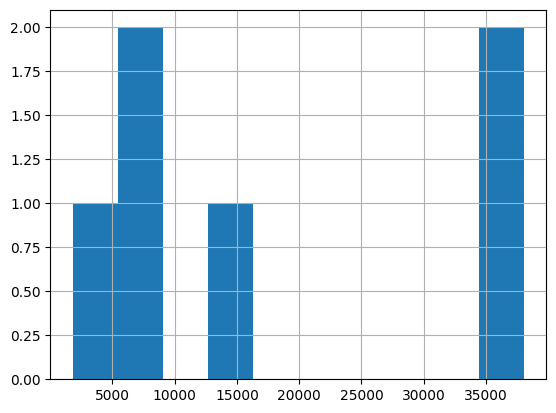

In [23]:
df.groupby(["Class", "satisfaction"]).size().hist()

### Data Preprocessing


In [54]:
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV ,cross_val_score


In [24]:
df["satisfaction"] = df["satisfaction"].replace({
    "neutral or dissatisfied": 0,
    "satisfied": 1
})
df["satisfaction"]

C:\Users\aboel\AppData\Local\Temp\ipykernel_5868\858286417.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["satisfaction"] = df["satisfaction"].replace({


0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64

In [25]:
df["Customer Type"] = df["Customer Type"].replace({
    "Loyal Customer": 1,
    "disloyal Customer": 0
})

C:\Users\aboel\AppData\Local\Temp\ipykernel_5868\4208809872.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Customer Type"] = df["Customer Type"].replace({


In [26]:
df["Type of Travel"] = df["Type of Travel"].replace({
    "Personal Travel": 0,
    "Business travel": 1
})

C:\Users\aboel\AppData\Local\Temp\ipykernel_5868\2379417402.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Type of Travel"] = df["Type of Travel"].replace({


In [27]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,1,13,0,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,0,25,1,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,1,26,1,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,1,25,1,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,1,61,1,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [28]:
df.drop(columns=['id', 'Arrival Delay in Minutes'], inplace=True)

In [29]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,1,13,0,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,0
1,Male,0,25,1,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,0
2,Female,1,26,1,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,1
3,Female,1,25,1,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,0
4,Male,1,61,1,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,1


In [33]:
df = pd.get_dummies(df, columns=["satisfaction",'Class','Gender', "Customer Type", "Type of Travel"], drop_first=True)


In [34]:
df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction_1,Class_Eco,Class_Eco Plus,Gender_Male,Customer Type_1,Type of Travel_1
0,13,460,3,4,3,1,5,3,5,5,...,4,5,5,25,False,False,True,True,True,False
1,25,235,3,2,3,3,1,3,1,1,...,1,4,1,1,False,False,False,True,False,True
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,5,0,True,False,False,False,True,True
3,25,562,2,5,5,5,2,2,2,2,...,1,4,2,11,False,False,False,False,True,True
4,61,214,3,3,3,3,4,5,5,3,...,3,3,3,0,True,False,False,True,True,True


In [35]:
test_df = pd.read_csv('../ARCHIVE/Airline Passenger Satisfaction/test.csv')

In [36]:

cols_to_drop = ["Unnamed: 0", "id"]
test_df = test_df.drop(columns=cols_to_drop)

# map categorical features
mappings = {
    "satisfaction": {"neutral or dissatisfied": 0, "satisfied": 1},
    "Customer Type": {"Loyal Customer": 1, "disloyal Customer": 0},
    "Type of Travel": {"Personal Travel": 0, "Business travel": 1}
}
test_df = test_df.replace(mappings)


C:\Users\aboel\AppData\Local\Temp\ipykernel_5868\2589851941.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df = test_df.replace(mappings)


In [37]:
test_df = pd.get_dummies(test_df, columns=["satisfaction",'Class','Gender', "Customer Type", "Type of Travel"], drop_first=True)


In [38]:
test_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_1,Class_Eco,Class_Eco Plus,Gender_Male,Customer Type_1,Type of Travel_1
0,52,160,5,4,3,4,3,4,3,5,...,5,5,50,44.0,True,True,False,False,True,True
1,36,2863,1,1,3,1,5,4,5,4,...,4,5,0,0.0,True,False,False,False,True,True
2,20,192,2,0,2,4,2,2,2,2,...,2,2,0,0.0,False,True,False,True,False,True
3,44,3377,0,0,0,2,3,4,4,1,...,1,4,0,6.0,True,False,False,True,True,True
4,49,1182,2,3,4,3,4,1,2,2,...,2,4,0,20.0,True,True,False,False,True,True


In [40]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [41]:
df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction_1,Class_Eco,Class_Eco Plus,Gender_Male,Customer Type_1,Type of Travel_1
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,...,0.8,1.0,1.0,0.015704,False,False,True,True,True,False
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,...,0.2,0.8,0.2,0.000628,False,False,False,True,False,True
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,...,0.8,0.8,1.0,0.000000,True,False,False,False,True,True
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,...,0.2,0.8,0.4,0.006910,False,False,False,False,True,True
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,...,0.6,0.6,0.6,0.000000,True,False,False,True,True,True


In [42]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['satisfaction_1'])
y = df['satisfaction_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 1. Logistic Regression

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [44]:
model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [45]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8766661854578701

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.91      0.89     11713
        True       0.87      0.84      0.86      9068

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



### 2. Random Forest

In [52]:
model = RandomForestClassifier(
    n_estimators=200,   
    max_depth=5,     
    random_state=42
)

model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9248833068668495

Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.94      0.93     11713
        True       0.92      0.90      0.91      9068

    accuracy                           0.92     20781
   macro avg       0.92      0.92      0.92     20781
weighted avg       0.92      0.92      0.92     20781



### 3.Decision Tree

In [55]:
# ممكن تبدأ بالافتراضيات
model = DecisionTreeClassifier(random_state=42)

# أو تتحكم في العمق لتقليل الـ overfitting
# model = DecisionTreeClassifier(max_depth=6, min_samples_split=10, random_state=42)

model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [57]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
y_test_pred = model.predict(X_test)

Accuracy: 0.9433136037726769

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.95      0.95     11713
        True       0.93      0.94      0.94      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781

